# Pymaceuticals Observations and Insights 

### 1.) Capomulin and Ramicane are Effective
    
    The biggest takeaway from the data, especially as we started zeroing in on specific treatments is that
    Capomulin and Ramicane tend to have the greatest impact on reducing tumor size. From looking at the median
    size on charts spread out across the entire array of treatments, there are significant jumps for those two
    drugs.


### 2.) Capomulin and Ramicane Extend Life
    
    Using the aforementioned drugs above, Capomulin and Ramicane also had the ability to administer more 
    overall treatments. The drugs seem to have kept their mice alive longer to be able to give additional 
    treatments. While this does skew the overall median of tumor size in the data (since they were able to 
    give more treatments), it does prove to be effective. 
    
### 3.) Capomulin and Ramicane Have Reliability
    
    Looking at the box plots for the most effective treatments (Capomulin, Ramicane, Infubinol, and Ceftamin)
    there is a large variability for Infubinol and Ceftamin. Aside from their obvious large tumor volume 
    numbers, much of their data is spread out with a large variety of volume figures. It's hard to really 
    decide from their boxplot how reliable their numbers are. Capomulin and Ramicane have much narrower boxes
    giving confidence that the results are replicable. 
    
    


Built with: Pandas, MatPlotLib, SciPy, NumPy, and Jupyter Notebook

Author: Rob Savage


In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='left')

# Display the data table for preview
merged_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mice_count = len(merged_df["Mouse ID"].unique())

print(mice_count)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df['Mouse ID'].value_counts().head(15)

# Following the structure of the timepoints, we see "g989" is an outlier with 13 appearances on the list. 

g989    13
o331    10
x773    10
a411    10
h246    10
a963    10
k862    10
i901    10
x822    10
j984    10
z578    10
g288    10
a897    10
p189    10
c832    10
Name: Mouse ID, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. Upon further inspection, we can see the duplicates in the expanded info on "g989."
g989_info = merged_df.loc[merged_df['Mouse ID'] == 'g989', :]

print(g989_info)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset=['Timepoint', 'Mouse ID'])

# Just to verify the code cleaned out what we wanted, we bring up the information on "g989" and can confirm our clean data set.
g989_info_2 = clean_df.loc[merged_df['Mouse ID'] == 'g989', :]

print(g989_info_2)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
910           48.786801                 0  
912           51.745156                 0  
914           51.325852                 1  
916           55.326122                 1  
918           56.045564                 1  
919           59.082294                 1  

In [6]:
# Checking the number of mice in the clean DataFrame.
# DF has been cleaned and we haven't lost any unique mice, success!
mice_count_clean = len(clean_df["Mouse ID"].unique())

print(mice_count_clean)

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_reg = clean_df.groupby(['Drug Regimen'])
drug_mean = drug_reg['Tumor Volume (mm3)'].mean()
drug_med = drug_reg['Tumor Volume (mm3)'].median()
drug_var = drug_reg['Tumor Volume (mm3)'].var()
drug_std = drug_reg['Tumor Volume (mm3)'].std()
drug_sem = drug_reg['Tumor Volume (mm3)'].sem()

drug_sum_stat = pd.DataFrame({'Mean': drug_mean,
                                'Median': drug_med,
                                'Variance': drug_var,
                                'STD': drug_std,
                                'SEM': drug_sem })

drug_sum_stat.head(10)

# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_reg = clean_df.groupby(['Drug Regimen'])
drug_reg.agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Treatments')

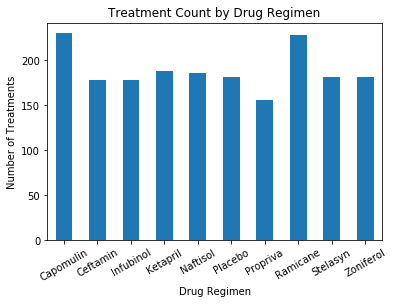

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_reg = clean_df.groupby(['Drug Regimen'])
mice_drug_count = drug_reg['Mouse ID'].count()

# Plotting the bar graph
drug_reg['Mouse ID'].count().plot(kind='bar', title='test')

# Adjusting the tick labels to make it readable
plt.xticks(rotation=30, horizontalalignment='center')

# Labeling the charts and axis'
plt.title("Treatment Count by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Treatments")

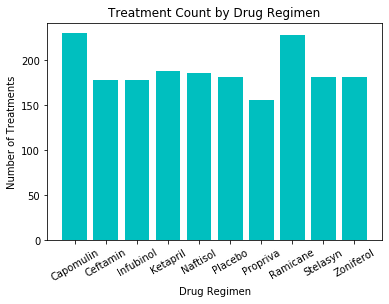

In [26]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_reg = clean_df.groupby(['Drug Regimen'])
mice_drug_count = drug_reg['Mouse ID'].count()
x_axis = np.arange(len(mice_drug_count))

plt.bar(x_axis, mice_drug_count, color="c", align="center")

# Hard coding the the drug names 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", 
                            "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
# Formatting
plt.xticks(rotation=30, horizontalalignment='center')
plt.title("Treatment Count by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Treatments")
plt.savefig('../Images/bar_chart.png', dpi=125)
plt.show()

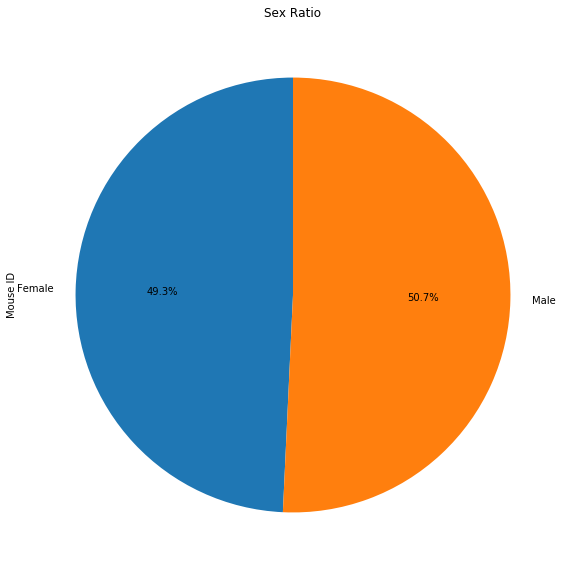

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = clean_df.groupby(['Sex'])

sex['Mouse ID'].count().plot(kind='pie', title='Sex Ratio', startangle=90, figsize=(15,10), autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x7fd2defbd250>,
 [Text(-1.099701533132135, 0.025622998006324282, 'Female'),
  Text(1.099701530733132, -0.025623100967813027, 'Male')],
 [Text(-0.5998371998902553, 0.013976180730722335, '49.3%'),
  Text(0.5998371985817083, -0.013976236891534377, '50.7%')])

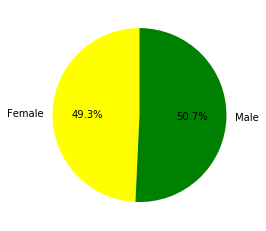

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_df.groupby(['Sex'])


sex_data = pd.DataFrame(sex['Mouse ID'].count())
sex_data.reset_index()

# Formatting 
colors = ['yellow', 'green']

plt.pie(sex_data['Mouse ID'], colors=colors, labels=['Female', 'Male'], autopct="%1.1f%%", 
        startangle=90)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Created variables for each individual drug
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

In [14]:
# Capomulin

# Finding the last timepoint on Capomulin
cap_last = capomulin_df.groupby(['Mouse ID']).last()['Timepoint']
cap_last_frame = cap_last.to_frame()

# Merging dataframes on Mouse ID and Timepoint
cap_merge = pd.merge(cap_last_frame, clean_df, on=('Mouse ID', 'Timepoint'), how='left')
cap_merge.head(15)

capomulin = cap_merge['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq  

print(f"The interquartile range of tumor volume for Capomulin is: {iqr}")  
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} for Capomulin could be outliers.")
print(f"Values above {upper_bound} for Capomulin could be outliers.")


The interquartile range of tumor volume for Capomulin is: 7.781863460000004
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.


In [15]:
# Ramicane

# Finding the last timepoint on Ramicane
ram_last = ramicane_df.groupby(['Mouse ID']).last()['Timepoint']
ram_last_frame = ram_last.to_frame()

# Merging dataframes on Mouse ID and Timepoint
ram_merge = pd.merge(ram_last_frame, clean_df, on=('Mouse ID', 'Timepoint'), how='left')
ram_merge.head(15)

ramicane = ram_merge['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq  

print(f"The interquartile range of tumor volume for Ramicane is: {iqr}")  
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} for Ramicane could be outliers.")
print(f"Values above {upper_bound} for Ramicane could be outliers.")

The interquartile range of tumor volume for Ramicane is: 9.098536719999998
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.


In [16]:
# Infubinol

# Finding the last timepoint on Ramicane
inf_last = infubinol_df.groupby(['Mouse ID']).last()['Timepoint']
inf_last_frame = inf_last.to_frame()

# Merging dataframes on Mouse ID and Timepoint
inf_merge = pd.merge(inf_last_frame, clean_df, on=('Mouse ID', 'Timepoint'), how='left')
inf_merge.head(15)

infubinol = inf_merge['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq  

print(f"The interquartile range of tumor volume for Infubinol is: {iqr}")  
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} for Infubinol could be outliers.")
print(f"Values above {upper_bound} for Infubinol could be outliers.")

The interquartile range of tumor volume for Infubinol is: 11.477135160000003
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 82.74144559000001 for Infubinol could be outliers.


In [17]:
# Ceftamin

# Finding the last timepoint on Ramicane
cef_last = ceftamin_df.groupby(['Mouse ID']).last()['Timepoint']
cef_last_frame = cef_last.to_frame()

# Merging dataframes on Mouse ID and Timepoint
cef_merge = pd.merge(cef_last_frame, clean_df, on=('Mouse ID', 'Timepoint'), how='left')
cef_merge.head(15)

ceftamin = cef_merge['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq  

print(f"The interquartile range of tumor volume for Ceftamin is: {iqr}")  
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} for Ceftamin could be outliers.")
print(f"Values above {upper_bound} for Ceftamin could be outliers.")

The interquartile range of tumor volume for Ceftamin is: 15.577752179999997
Values below 25.355449580000002 for Ceftamin could be outliers.
Values above 87.66645829999999 for Ceftamin could be outliers.


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_data = [capomulin, ramicane, infubinol, ceftamin]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

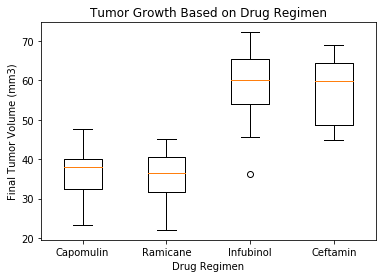

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Growth Based on Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(treatment_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
plt.savefig('../Images/box_whiskers.png', dpi=125)
plt.show()

## Line and Scatter Plots

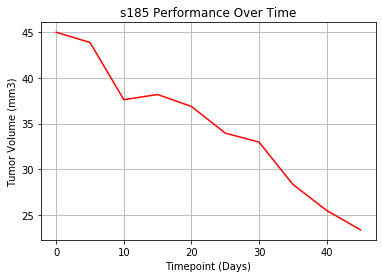

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = cap_merge['Tumor Volume (mm3)']

# Establish a variable for the s185 data frame
s185_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 's185', :]

# Set up the line plot
cap_time = s185_df['Timepoint']
cap_tumor = s185_df['Tumor Volume (mm3)']
cap_plot, = plt.plot(cap_time, cap_tumor, color="red")

# Formatting
plt.title("s185 Performance Over Time")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.savefig('../Images/line_chart.png', dpi=125)
plt.show()


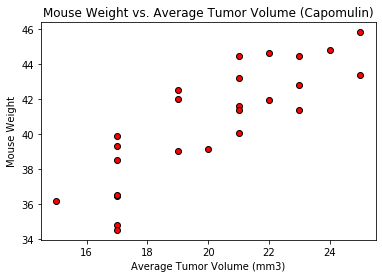

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Creating variables for scatter plot
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
capomulin_df

cap_avg_var = capomulin_df.groupby(['Mouse ID']).mean()

# Building the scatter plot
plt.scatter(cap_avg_var['Weight (g)'], cap_avg_var['Tumor Volume (mm3)'], marker="o", facecolors="red", edgecolors="black")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Mouse Weight")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume with Capomulin is 0.84


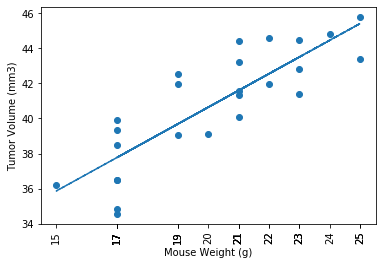

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calcuating the correlation coefficient 
print(f"The correlation coefficient between mouse weight and average tumor volume with Capomulin is {round(st.pearsonr(cap_avg_var['Weight (g)'], cap_avg_var['Tumor Volume (mm3)'])[0],2)}")

# Grabbing the linear regression figures
cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(cap_avg_var['Weight (g)'], cap_avg_var['Tumor Volume (mm3)'])

cap_fit = cap_slope * cap_avg_var['Weight (g)'] + cap_int

# Creating the model & Formatting
plt.scatter(cap_avg_var['Weight (g)'], cap_avg_var['Tumor Volume (mm3)'])
plt.plot(cap_avg_var['Weight (g)'],cap_fit,"--")
plt.xticks(cap_avg_var['Weight (g)'], rotation=90)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
